# Importing main.ipynb

In order to use prepared datasets of main.ipynb for model fitting, we need to import that..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<string>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
<string>:12: UserWarning: FixedFormatter should only be used together with FixedLocator


Percentage of Fraud Tnx in datasets : 0.17%
The number of Classes before the fit Counter({0: 284315, 1: 492})
The number of Classes after the fit Counter({0: 492, 1: 492})


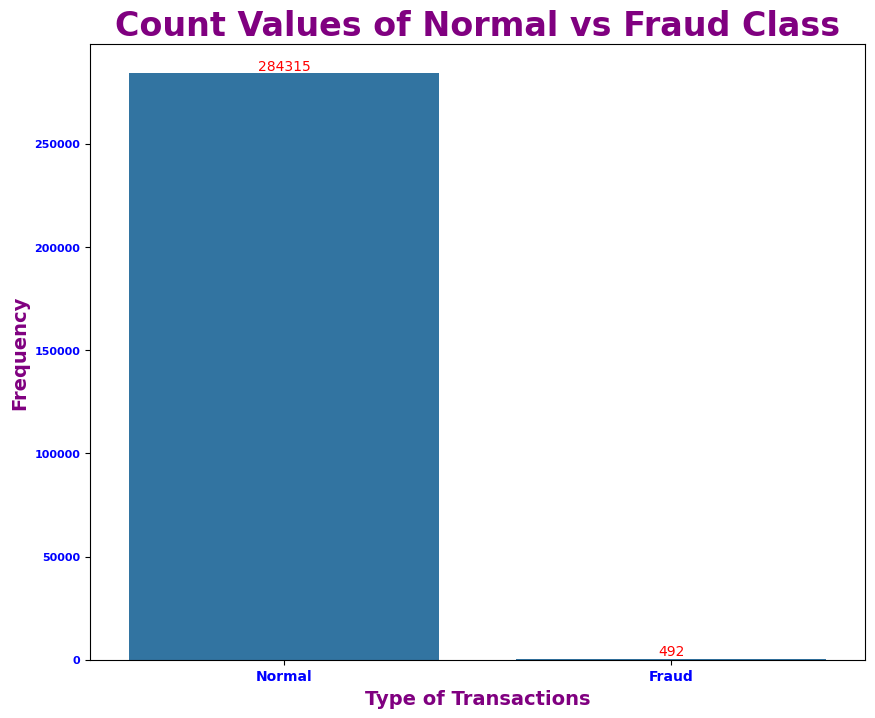

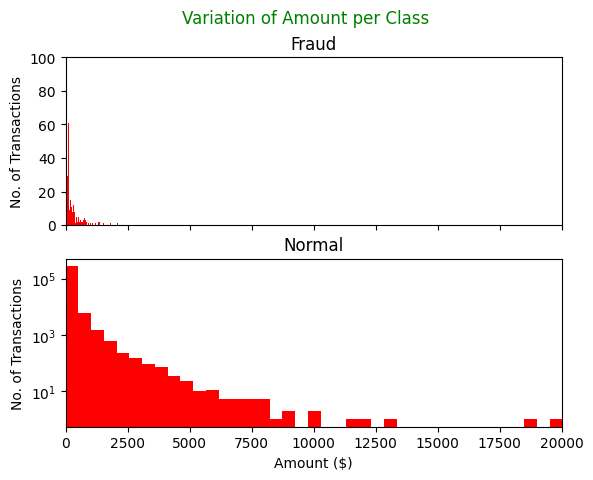

In [2]:
# pip install import-ipynb
import import_ipynb
import main ### Importing main.ipynb

In [3]:
## Importing necessary libraries..
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Function for model fitting, model evaluation and Visualization.

In [5]:
def GNB_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")
    
    print("Model Fitting.....")
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    print("Successfully model fitted!!!")
    
    print("------------Training Prediction--------------")
    y_preds = gnb.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")
    
    cf_matrix = confusion_matrix(y_train, y_preds)
    
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = gnb.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");
    
    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

## GaussianNB on Normal Datasets.

In [ ]:
GNB_model(main.X, main.y)

## GuassianNB on StandardScaled Dataset

In [ ]:
GNB_model(main.X_scaled, main.y_scaled)

### GuassianNB on Undersampled Dataset

In [ ]:
GNB_model(main.X_undersampled, main.y_undersampled)

### GuassianNB on Oversampled Dataset

In [ ]:
GNB_model(main.X_oversampled, main.y_oversampled)

### GuassianNB on SMOTE Dataset

In [ ]:
GNB_model(main.X_smote, main.y_smote)

### CONCLUSION:
a) GaussianNB doesn't work efficiently for these imbalanced datasets.

b) It takes around 1 minute for training.

c) Maximum Accuracy of 91.886640% and Macro Average of F1-Score of 0.92 achieved with Oversampling techniques, considering both accuracy and macro values.
